In [18]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
cmip_dat=xr.open_mfdataset('data/cmip-present/*.nc')

In [4]:
cmip_yearly=cmip_dat.groupby('time.year').mean('time')

In [124]:
cmip_pred=xr.open_dataset('data/ssp585.nc').groupby('time.year').mean('time')

In [127]:
first_ten=cmip_yearly.isel(year=slice(0,10)).mean('year')['tas']

In [154]:
#last=cmip_yearly.isel(year=-2)['tas']
#last=cmip_pred.isel(year=-1)['tas']
last=first_ten

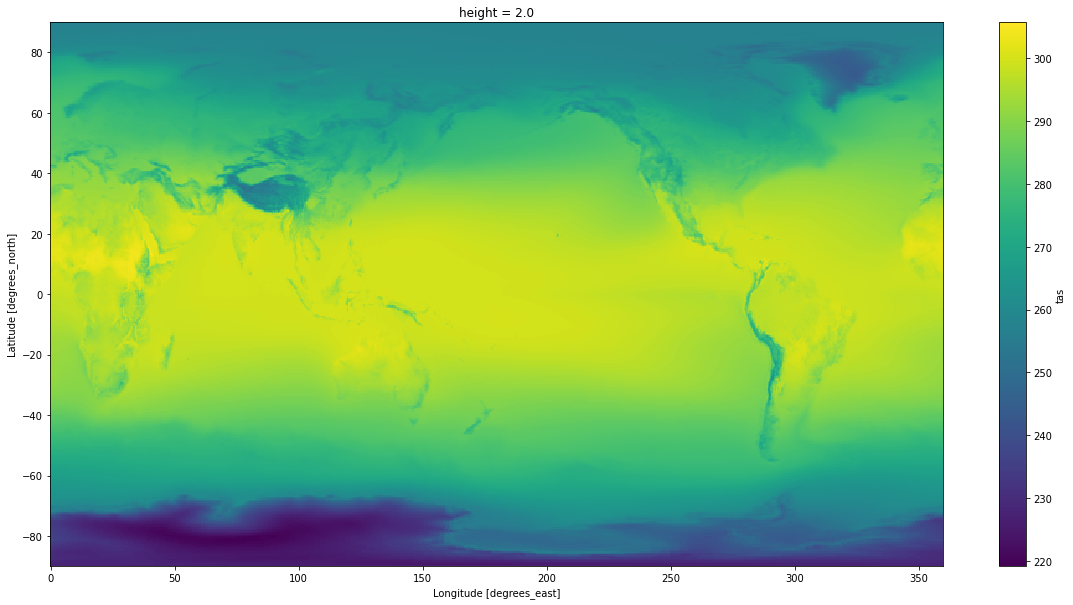

In [155]:
plt.figure(figsize=(20,10))
first_ten.plot()

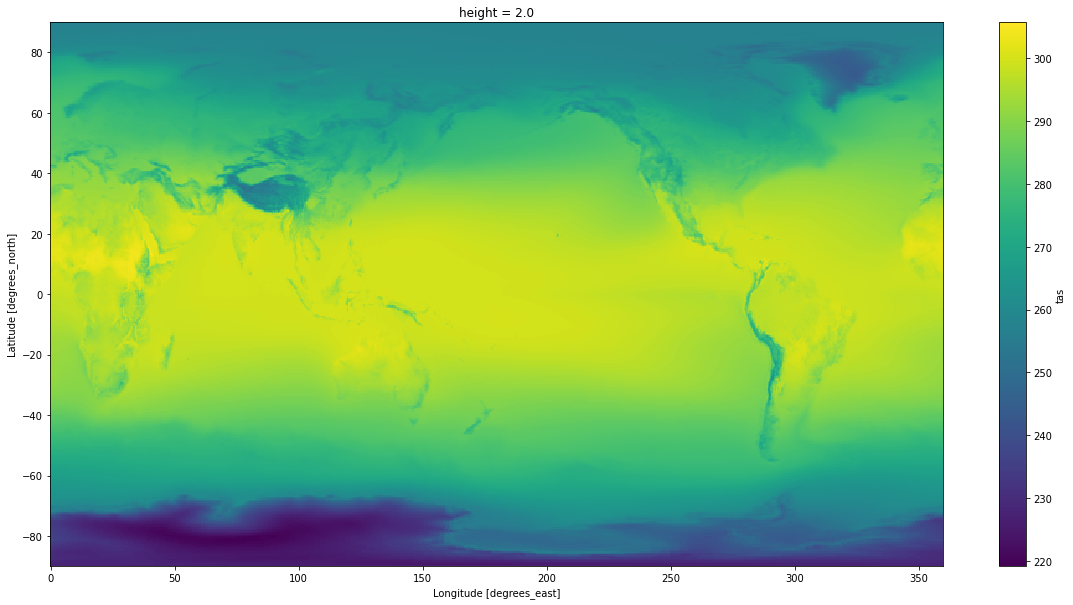

In [156]:
plt.figure(figsize=(20,10))
last.plot()

In [157]:
T_ref=np.roll(first_ten.values, 360, axis=1)

In [158]:
T_map=np.roll(last.values, 360, axis=1)

In [159]:
# plt.figure(figsize=(20,10))
# plt.imshow(T_map,  origin='lower')

In [160]:
import get_initial_mapping as func

In [161]:
the_map=func.T_mapping(T_map, 5, T_ref)

In [162]:
image=np.array(Image.open('data/sat_image.jpg'))

In [163]:
distorted=np.full(image.shape, np.nan)
for i in range(image.shape[0]):
    for j in range(T_map.shape[1]):
        distorted[int(the_map[i,j][0]),int(the_map[i,j][1]),:]=image[i,j,:]

In [164]:
distorted=xr.DataArray(distorted).interpolate_na(dim='dim_1').values

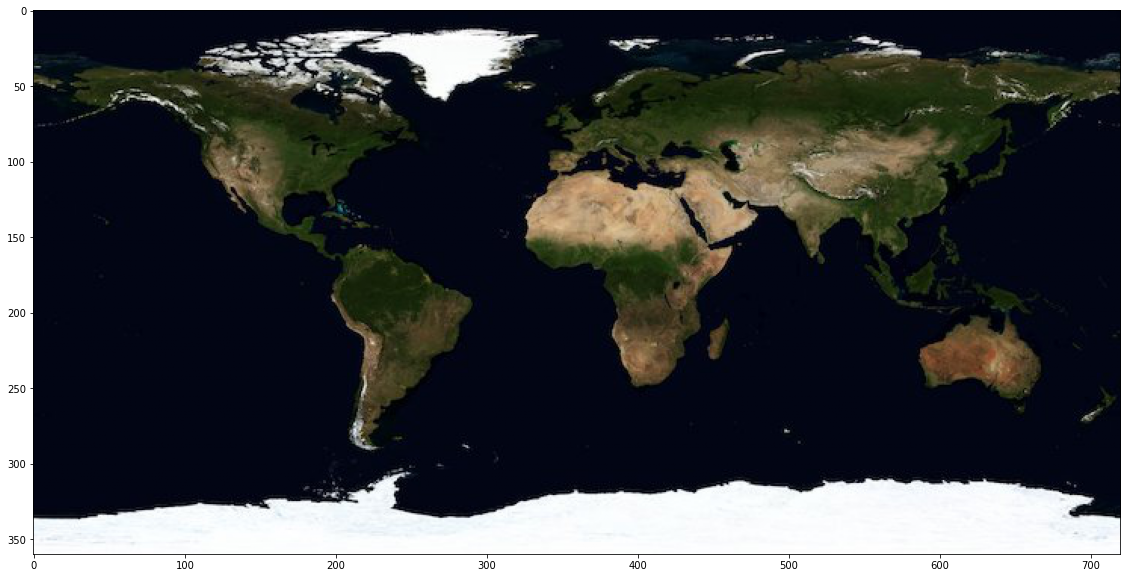

In [165]:
plt.figure(figsize=(20,10))

plt.imshow(distorted/255)

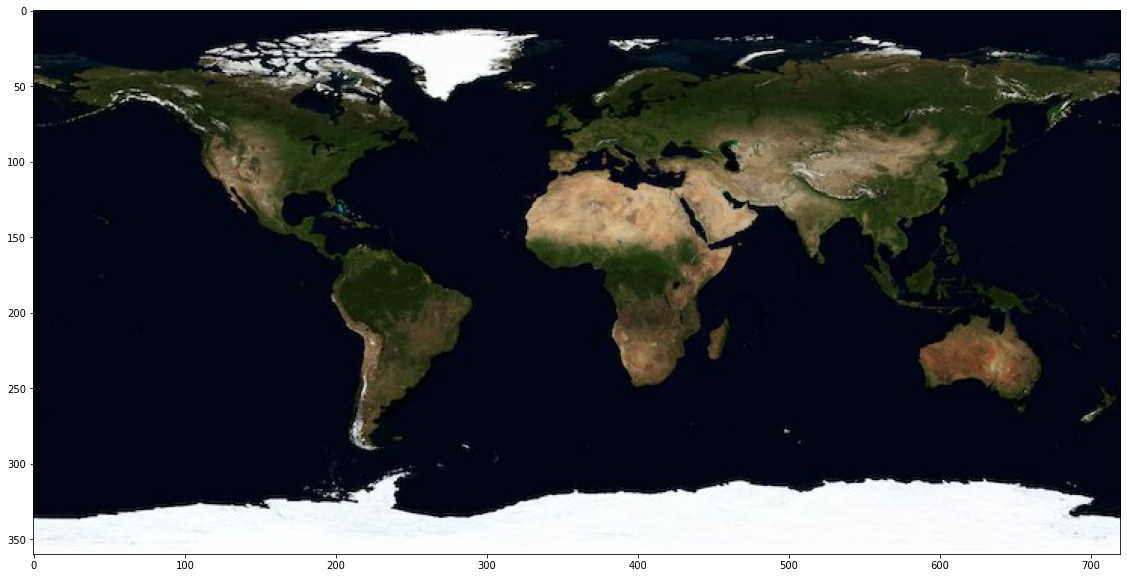

In [153]:
plt.figure(figsize=(20,10))
plt.imshow(image)